In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
haberman = pd.read_csv("haberman.csv")
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
# Check the number of data points as well as some statistics about the data
print(len(haberman))
haberman.describe()

306


,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
# Check if there is any null value in the data
column_lst = haberman.columns
for column in column_lst:
    print("{} has : {} null values".format(column,haberman[column].isna().sum()))

age has : 0 null values
year has : 0 null values
nodes has : 0 null values
status has : 0 null values


In [8]:
# check the data type of each attributes
haberman.dtypes

age       int64
year      int64
nodes     int64
status    int64
dtype: object

In [9]:
# different lymph nodes
haberman["nodes"].unique()

array([ 1,  3,  0,  2,  4, 10,  9, 30,  7, 13,  6, 15, 21, 11,  5, 23,  8,
       20, 52, 14, 19, 16, 12, 24, 46, 18, 22, 35, 17, 25, 28])

In [10]:
# Value counts of the status 
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

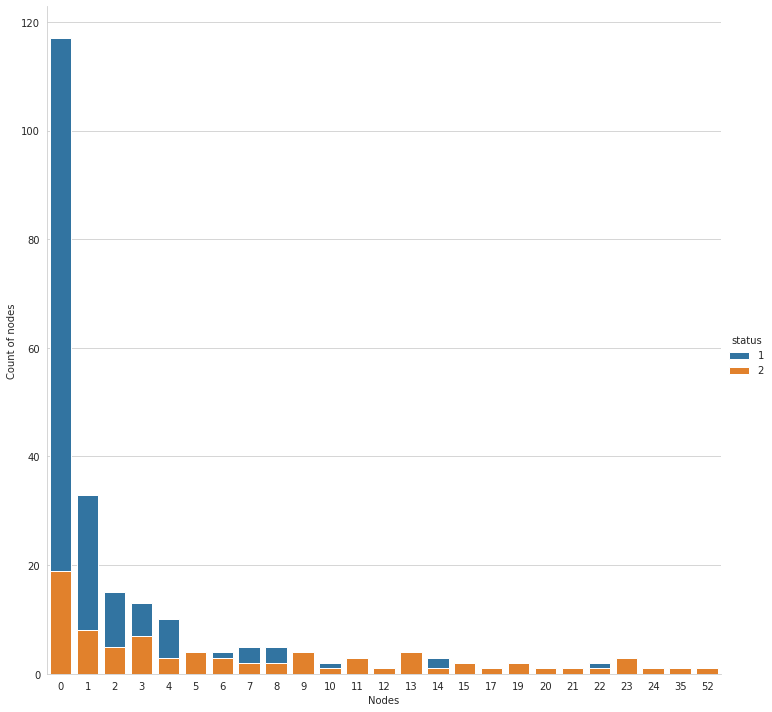

In [30]:
# distribution of different nodes values
#plt.figure(figsize=(25,15))
sns.FacetGrid(haberman , hue = "status" , size = 10) \
   .map(sns.countplot , "nodes").add_legend()
plt.xlabel("Nodes")
plt.ylabel("Count of nodes")
plt.show()



### Conclusion : if AxillaryNodes = 0 than patient survives longer else AxillaryNodes≥0 && Axillary nodes ≤3.5 approx then Long survival chances are high and if Axillary nodes ≥3.5 , patient has short survival chance

In [12]:
haberman["age"].unique()
# The age is ranging between 30 and 83

array([30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83])

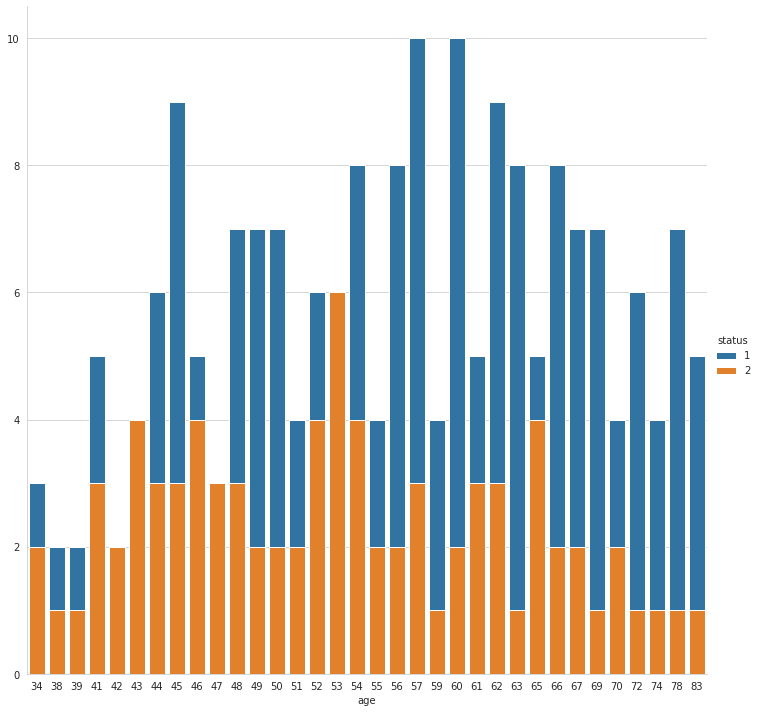

In [22]:
# Distrubution of status w.r.t age
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue = "status" , size = 10) \
   .map(sns.countplot , "age" ).add_legend()
plt.show()

### Conclusion : We cant conclude much from this ecxept the ratio of low survial to more survival from age 69 to 83 is less

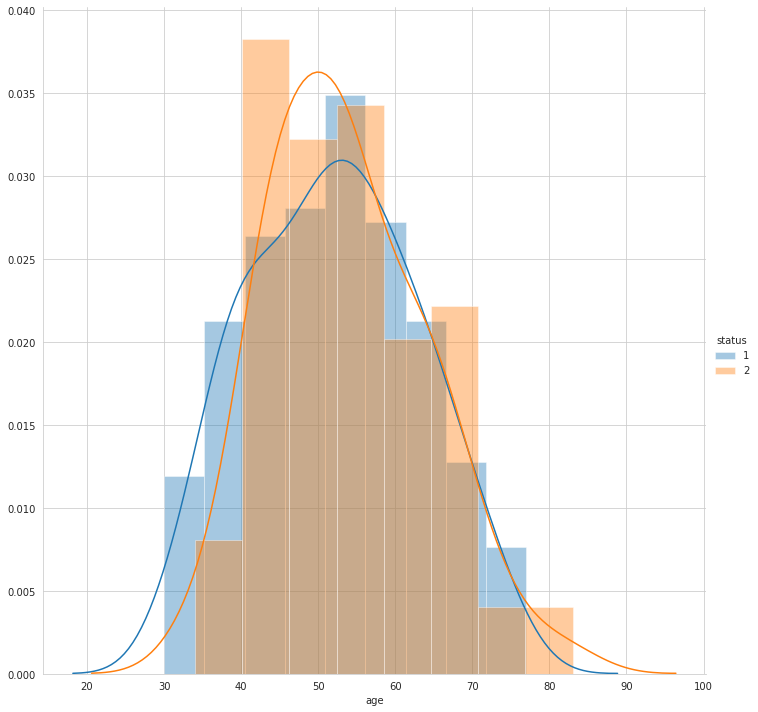

In [31]:
# Distrubution of status w.r.t age
sns.FacetGrid(haberman, hue = "status" , size = 10) \
   .map(sns.distplot , "age" ).add_legend()
plt.show()


### Conclusion : Here we can see that the age range from 30–75 the status of survival and death is same

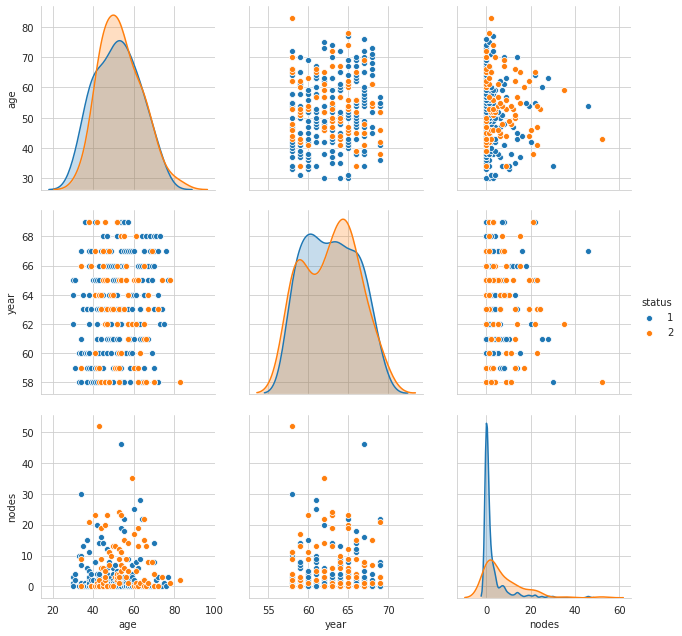

In [45]:
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=3 , vars = ["age" ,  "year" , "nodes" ]);
plt.show()

### Conclusion: Except plot 3 we cant get much insight about the data if we leave behind the graphs having the  mirror images. But in plot 3 also we also cant get much insight as we cant cluster one group for distinguishing in this plot and also it doesnt give much information.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


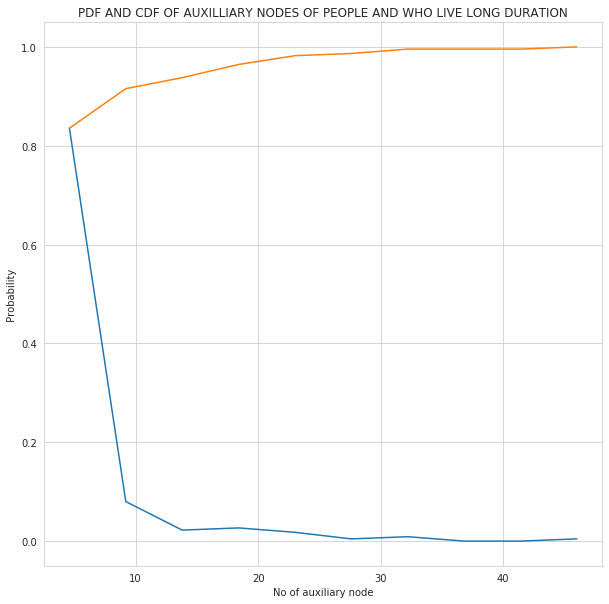

In [58]:
# Plot CDF w.r.t to auxilliaty nodes

haberman_longer_survival = haberman[haberman["status"] == 1]
haberman_short_survival = haberman[haberman["status"] == 2]

plt.figure(figsize = (10,10))
counts, bin_edges = np.histogram(haberman_longer_survival["nodes"], bins=10, 
 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel("No of auxiliary node")
plt.ylabel(" Probability ")
plt.title("PDF AND CDF OF AUXILLIARY NODES OF PEOPLE AND WHO LIVE LONG DURATION")
plt.show()

### As we can see here that there is 83-85 percent chance that the patient will live longer when he has less the 5 auxilliary nodes1

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


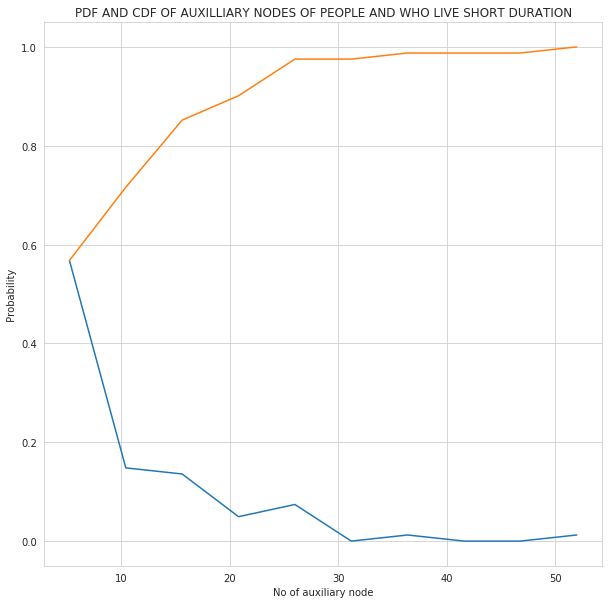

In [59]:
counts, bin_edges = np.histogram(haberman_short_survival['nodes'], bins=10, 
                                 density = True)
plt.figure(figsize = (10,10))
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("No of auxiliary node")
plt.ylabel(" Probability ")
plt.title("PDF AND CDF OF AUXILLIARY NODES OF PEOPLE AND WHO LIVE SHORT DURATION")
plt.show()

### Conclusion : This shows that there is around 55 percent chances of the people with less than 5 auxilliary node will have shorted duration after the surgery.

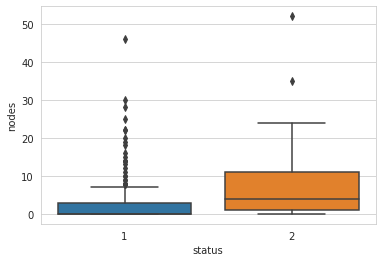

In [60]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

### 25th percentile and 50th percentile are nearly same for Long survive and threshold for it is 0 to 5. For short survival there are 25th percentile of nodes that are nearly same as long survive 50th percentile. There aremany outliers in long survial plot after 8th node

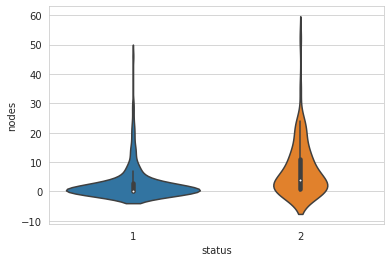

In [63]:
sns.violinplot(x='status', y='nodes',data=haberman)
plt.legend
plt.show()

 ###  There is very much density near 0 nodes in the first violin plot cosisting of patiets who lived long duration. There is huge uniform spread in throughtout after 25 node. There is huge uniform spread in throughtout after 30th node in the second plot